In [1]:
# RNORM Generates random numbers from normal distribution
# DNORM Probability Density Function(PDF)
# PNORM Cumulative Distribution Function(CDF)
# QNORM Quantile Function – inverse of pnorm
#
# dunif(x, min = 0, max = 1, log = FALSE)
# punif(q, min = 0, max = 1, lower.tail = TRUE, log.p = FALSE)
# qunif(p, min = 0, max = 1, lower.tail = TRUE, log.p = FALSE)
# runif(n, min = 0, max = 1)

# pnorm() function is: scipy.stats.norm.cdf()
# qnorm() function is: scipy.stats.norm.ppf()


![r](images/statr.png)

![py](images/statpy.png)

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm

In [3]:
s2 = 1
t2 = 10
mu = 5
n = 5 

In [4]:
# rounding the rnorm to 2 decimal places
# y<-round(rnorm(n,10,1),2) #rnorm(n, mean = 10, sd = 1)
# rvs(loc=0, scale=1, size=1, random_state=None)
y = norm.rvs(10,1,n)
y

array([ 9.61128498,  8.08616785, 10.33276371,  9.31064767, 10.39462399])

In [5]:
# mean of the normal posterior
# mu.n<-( mean(y)*n/s2 + mu/t2 )/( n/s2+1/t2)

mu_n = (np.mean(y)*n/s2 + mu/float(t2))/(n/float(s2)+1/float(t2)) 
mu_n

9.457938861881416

In [6]:
# variance of the normal posterior
# t2.n<-1/(n/s2+1/t2)

t2_n = 1.0/(n/float(s2)+1.0/t2)
t2_n

0.19607843137254904

In [7]:
# defining the data
# y<-c(9.37, 10.18, 9.16, 11.60, 10.33)

y = [9.37, 10.18, 9.16, 11.60, 10.33]

In [8]:
####metropolis part####
##S = total num of simulations
# theta<-0 ; delta<-2 ; S<-10000 ; THETA<-NULL ; set.seed(1)

theta = 0 
delta = 2

S = 50000

theta_v = []

In [9]:
for s in range(S):
    theta_star = norm.rvs(theta,np.sqrt(delta),1)
    logr = (sum(np.log(norm.pdf(y,theta_star,np.sqrt(s2)))) +\
            sum(np.log(norm.pdf(theta_star,mu,np.sqrt(t2)))))- \
           (sum(np.log(norm.pdf(y,theta,np.sqrt(s2)))) + \
            sum(np.log(norm.pdf([theta],mu,np.sqrt(t2)))))
    #print(logr)
    if np.log(np.random.uniform(0,1,1))<logr:
        theta = theta_star
    #print(theta)    
    theta_v.append(theta)    

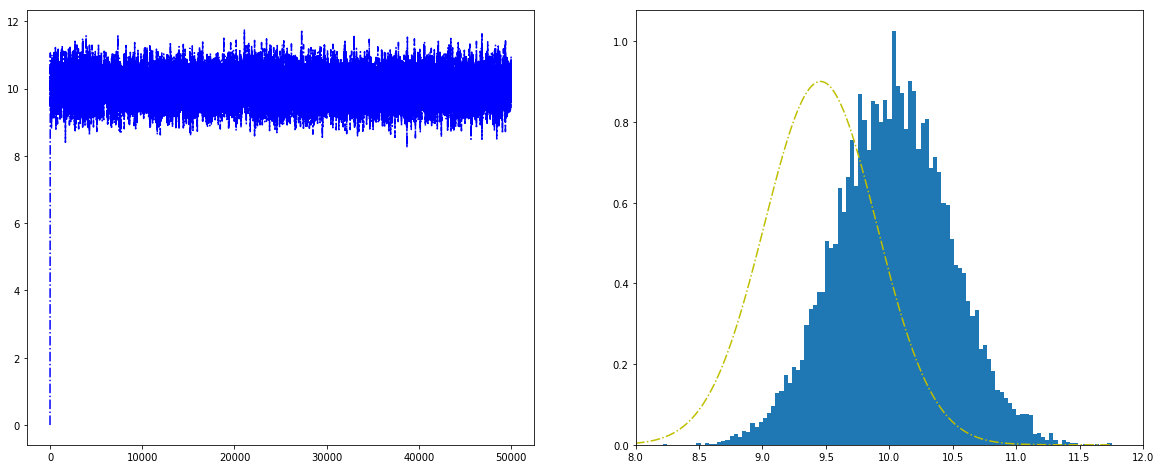

In [11]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.plot(theta_v,'b-.')
        
plt.subplot(1, 2, 2)
bins = np.arange(0, S, 10) 
plt.hist(theta_v, density=True,bins='auto')
x = np.linspace(min(theta_v),max(theta_v),1000) 
y = norm.pdf(x,mu_n,np.sqrt(t2_n))
plt.plot(x,y,'y-.')
plt.xlim(right=12)  # adjust the right leaving left unchanged
plt.xlim(left=8)  # adjust the left leaving right unchanged
plt.show()